In [5]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('../csvFiles/train.csv')
df.head()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81


In [7]:
df1 = df.drop(['Roll no','Section'],axis='columns')
df1.head()

,test preparation,gender,parental level of education,lunch,practical score,viva score,exam score
0,none,male,some college,standard,70,73,70
1,none,male,master's degree,free/reduced,55,54,52
2,none,male,master's degree,free/reduced,56,46,43
3,none,female,some college,free/reduced,35,47,41
4,none,female,high school,standard,87,92,81


In [8]:
df1.shape

(31999, 7)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   test preparation             31999 non-null  object
 1   gender                       31999 non-null  object
 2   parental level of education  31999 non-null  object
 3   lunch                        31999 non-null  object
 4   practical score              31999 non-null  int64 
 5   viva score                   31999 non-null  int64 
 6   exam score                   31999 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.7+ MB


In [22]:
df1.describe()

,practical score,viva score,exam score
count,31999.000000,31999.000000,31999.000000
mean,67.839870,70.375168,69.139598
std,15.229898,14.092764,15.009974
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.000000,70.000000
75%,80.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [23]:
df1['lunch'].isnull().sum()

0

In [24]:
df1.columns

Index(['test preparation ', 'gender', 'parental level of education', 'lunch',
       'practical score', 'viva score', 'exam score'],
      dtype='object')

In [25]:
df1['parental level of education'].unique()

array(['some college', "master's degree", 'high school',
       "associate's degree", 'some high school', "bachelor's degree"],
      dtype=object)

In [26]:
df2_encoded = pd.get_dummies(df1,columns=['parental level of education', 'test preparation ', 'gender', 'lunch'])
df2_encoded.head()

,practical score,viva score,exam score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation _completed,test preparation _none,gender_female,gender_male,lunch_free/reduced,lunch_standard
0,70,73,70,False,False,False,False,True,False,False,True,False,True,False,True
1,55,54,52,False,False,False,True,False,False,False,True,False,True,True,False
2,56,46,43,False,False,False,True,False,False,False,True,False,True,True,False
3,35,47,41,False,False,False,False,True,False,False,True,True,False,True,False
4,87,92,81,False,False,True,False,False,False,False,True,True,False,False,True


In [27]:
def remove_prefix(column_name):
    if '_' in column_name:
        return column_name.split('_', 1)[1]  # Split on the first underscore and take the second part
    else:
        return column_name

In [28]:
df2_encoded.columns = [remove_prefix(col) for col in df2_encoded.columns]
df2_encoded.head()

,practical score,viva score,exam score,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,completed,none,female,male,free/reduced,standard
0,70,73,70,False,False,False,False,True,False,False,True,False,True,False,True
1,55,54,52,False,False,False,True,False,False,False,True,False,True,True,False
2,56,46,43,False,False,False,True,False,False,False,True,False,True,True,False
3,35,47,41,False,False,False,False,True,False,False,True,True,False,True,False
4,87,92,81,False,False,True,False,False,False,False,True,True,False,False,True


In [29]:
df2_encoded.shape

(31999, 15)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['practical score', 'viva score']

df2_encoded[columns_to_standardize] = scaler.fit_transform(df2_encoded[columns_to_standardize])
df2_encoded.head()


,practical score,viva score,exam score,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,completed,none,female,male,free/reduced,standard
0,0.141837,0.186257,70,False,False,False,False,True,False,False,True,False,True,False,True
1,-0.843083,-1.161974,52,False,False,False,True,False,False,False,True,False,True,True,False
2,-0.777422,-1.729650,43,False,False,False,True,False,False,False,True,False,True,True,False
3,-2.156310,-1.658690,41,False,False,False,False,True,False,False,True,True,False,True,False
4,1.258080,1.534487,81,False,False,True,False,False,False,False,True,True,False,False,True


In [32]:
X = df2_encoded.drop('exam score',axis='columns')
y = df2_encoded['exam score']


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [34]:
from sklearn.linear_model import LinearRegression
lenR = LinearRegression()
lenR.fit(X_train,y_train)
lenR.score(X_test,y_test)

0.0013974534021538032

In [39]:
df['Roll no'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
31994    False
31995    False
31996    False
31997    False
31998    False
Name: Roll no, Length: 31999, dtype: bool

# 2nd time above

In [12]:
df1

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,1,1,some college,1,Section A,70,73,70
1,EXA000002,1,1,master's degree,0,Section C,55,54,52
2,EXA000003,1,1,master's degree,0,Section E,56,46,43
3,EXA000004,1,0,some college,0,Section C,35,47,41
4,EXA000005,1,0,high school,1,Section C,87,92,81
...,...,...,...,...,...,...,...,...,...
31994,EXA031995,1,1,some high school,0,Section E,63,53,80
31995,EXA031996,1,0,high school,1,Section B,100,80,68
31996,EXA031997,1,1,bachelor's degree,0,Section B,62,61,74
31997,EXA031998,1,1,associate's degree,1,Section D,75,32,82


In [21]:
df2 = df1.drop(['Section','Roll no'],axis='columns')
df2.head()

,test preparation,gender,parental level of education,lunch,practical score,viva score,exam score
0,1,1,some college,1,70,73,70
1,1,1,master's degree,0,55,54,52
2,1,1,master's degree,0,56,46,43
3,1,0,some college,0,35,47,41
4,1,0,high school,1,87,92,81


In [14]:
dummies = pd.get_dummies(df2['parental level of education'])
dummies.head()

,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,False,False,False,False,True,False
1,False,False,False,True,False,False
2,False,False,False,True,False,False
3,False,False,False,False,True,False
4,False,False,True,False,False,False


In [15]:
df3 = pd.concat([df2,dummies],axis='columns')
df3.head()

,Roll no,test preparation,gender,parental level of education,lunch,practical score,viva score,exam score,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,EXA000001,1,1,some college,1,70,73,70,False,False,False,False,True,False
1,EXA000002,1,1,master's degree,0,55,54,52,False,False,False,True,False,False
2,EXA000003,1,1,master's degree,0,56,46,43,False,False,False,True,False,False
3,EXA000004,1,0,some college,0,35,47,41,False,False,False,False,True,False
4,EXA000005,1,0,high school,1,87,92,81,False,False,True,False,False,False


In [16]:
df2.columns

Index(['Roll no', 'test preparation ', 'gender', 'parental level of education',
       'lunch', 'practical score', 'viva score', 'exam score'],
      dtype='object')

In [17]:
df4 = df3.drop('parental level of education',axis='columns')
df4.head()

,Roll no,test preparation,gender,lunch,practical score,viva score,exam score,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,EXA000001,1,1,1,70,73,70,False,False,False,False,True,False
1,EXA000002,1,1,0,55,54,52,False,False,False,True,False,False
2,EXA000003,1,1,0,56,46,43,False,False,False,True,False,False
3,EXA000004,1,0,0,35,47,41,False,False,False,False,True,False
4,EXA000005,1,0,1,87,92,81,False,False,True,False,False,False


In [18]:
X = df4.drop(['exam score','Roll no'],axis='columns')
y = df4['exam score']
X.head()

,test preparation,gender,lunch,practical score,viva score,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,1,1,1,70,73,False,False,False,False,True,False
1,1,1,0,55,54,False,False,False,True,False,False
2,1,1,0,56,46,False,False,False,True,False,False
3,1,0,0,35,47,False,False,False,False,True,False
4,1,0,1,87,92,False,False,True,False,False,False


In [19]:
y.head()

0    70
1    52
2    43
3    41
4    81
Name: exam score, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [56]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

-0.1209170880711612

In [36]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

svr.predict(X_test)

array([69.90376871, 69.22112288, 67.79715234, ..., 67.45694497,
       71.82981171, 72.21731207])

In [37]:
svr.score(X_test,y_test)

-0.004303984066855726

In [78]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train, y_train)
model.score(X_test,y_test)

-0.42010746529113585

In [62]:
from sklearn.linear_model import LinearRegression
lenR = LinearRegression()
lenR.fit(X_train,y_train)
lenR.score(X_test,y_test)

0.00137602731883113

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

GradBoo = GradientBoostingRegressor(n_estimators=100)
GradBoo.fit(X_train, y_train)
GradBoo.predict(X_test)

array([69.18344886, 69.63892666, 68.3504982 , ..., 67.90194097,
       67.47666298, 70.26079526])

In [64]:
GradBoo.score(X_test,y_test)

0.0014466651093069105

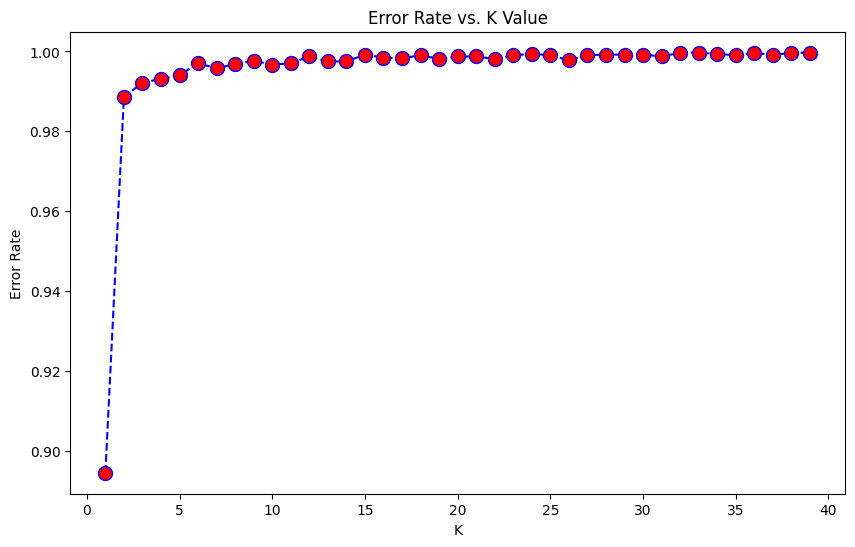

In [72]:
error_rate = []

# Will take some time
for i in range(1, 40):

	knn = KNeighborsRegressor(n_neighbors=i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
		linestyle='dashed', marker='o',
		markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()